# Overplotting

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative.

The visualization will suffer from ***overplotting***, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

**Some techniques that help with the overplotting problem:**
1. **Jitter** - Randomly add/subtract a small value to each data point.
2. **Transparency** - make the data points a little bit transparent so the more overlapping data points are, the darker the region is.
3. **Sampling** - Plot randomly less number of the data points.
---

**Example - 1**

![overplot example](Images/Overplot_Example.png)

Take for example, this plot of 10,000 data points generated from a couple of bivariate normal distributions.

It's hard to tell where the drop off in density is from the distribution's peaks and how fast it occurs.

### Sampling

One way of solving this is to use random sampling to plot a smaller number of points.
Let's say 800.

![Sampling](Images/Sampling.png)

We can clearly see the gap in peaks where fewer points are plotted.\
The random selection of points still gives us a good intuition for the general distribution of data.

### Transparency

As an alternative strategy, we can still plot our original 10,000 points but plot each point with some transparency instead.

![Transparency](Images/Trans.png)

Each individual point will be lighter in color but when points overlap, the overlapped region becomes darker.

The two darkest regions are those with the highest number of points indicating the peaks of the distributions.

---
### Jitter

What if one or both of our variables are discrete?

- Sampling doesn't help at all because any number of overlapping points all look the same.

- Transparency allows us to make density judgments based on color but this loses some of the power available in positional encodings.

This is one case where we will want to add some jitter.

**Example - 2**
![Discrete Data](Images/Discrete.png)

Jittering adds a small amount of random noise to the position of each point so that multiple data points that have the same values are now spread over a small area.

![Jitter](Images/Jitter.png)

As long as the jitter keeps each of the discrete values in distinct bands, this can be a big help in the identification and interpretation of trends.

---

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [6]:
# Read the CSV file
fuel_econ = pd.read_csv('Files/fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


# Seaborn - Jitter
**Important Note:** Jitter is not a direct option in matplotlib's `scatter()` function.

However, it is a built-in option with seaborn's `regplot()` function.
* The x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made.

`sb.regplot(data, x, y, truncate, x_jitter)`:
* **truncate:** an attribute that controlos the regerssion bound.
    * If truncate=True, the regression line is bounded by the data limits. 
    * Else if truncate=False, it extends to the x axis limits.
* **x_jitter:** will make each x value to be adjusted randomly by +/-value.

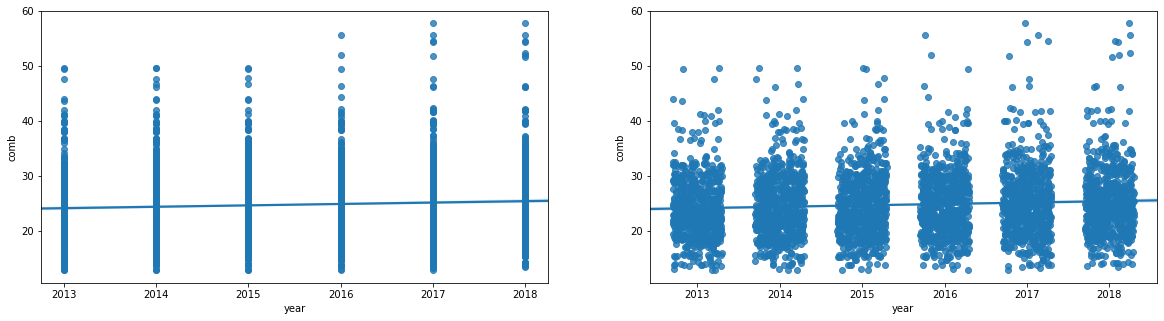

In [7]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False);


plt.subplot(1, 2, 2)
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

In the left scatter plot above, the degree of variability in the data and strength of relationship are fairly unclear.

In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative.

---

# Plot with both Jitter and Transparency
The right scatter plot has a jitter introduced to the data points.
You can add transparency to either `scatter()` or `regplot()` by adding the `"alpha"` parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque).

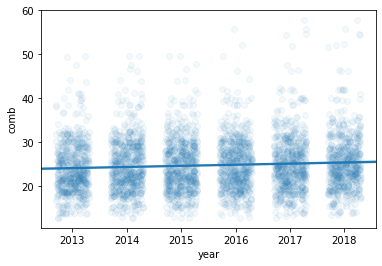

In [8]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

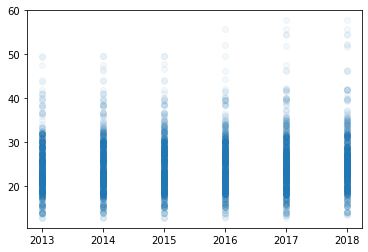

In [9]:
# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);